Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/Train/Test Data/train.csv")
pd.set_option('display.max_columns',None)
df.head(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0


Dropping the irrelavent columns

In [3]:
df=df.drop(columns=["id","Customer Feedback",'Policy Start Date'])

Understanding the data

In [4]:
# Number of rows and columns
df.shape

(1200000, 18)

In [5]:
# Data types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Smoking Status        1200000 non-

Understanding the data

In [6]:
# Summary statistics (numerical columns)
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [7]:
# Check data types directly
df.dtypes

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [8]:
# Check for missing values
df.isnull().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [9]:
# Check for duplicate rows
df.drop_duplicates
df.head(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Yes,Weekly,House,2022.0


In [10]:
# Number of unique values per column
df.nunique()

Age                         47
Gender                       2
Annual Income            88593
Marital Status               3
Number of Dependents         5
Education Level              4
Occupation                   3
Health Score            532655
Location                     3
Policy Type                  3
Previous Claims             10
Vehicle Age                 20
Credit Score               550
Insurance Duration           9
Smoking Status               2
Exercise Frequency           4
Property Type                3
Premium Amount            4794
dtype: int64

In [11]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaN in the count


Value counts for 'Gender':
Gender
Male      602571
Female    597429
Name: count, dtype: int64

Value counts for 'Marital Status':
Marital Status
Single      395391
Married     394316
Divorced    391764
NaN          18529
Name: count, dtype: int64

Value counts for 'Education Level':
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

Value counts for 'Occupation':
Occupation
NaN              358075
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

Value counts for 'Location':
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

Value counts for 'Policy Type':
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

Value counts for 'Smoking Status':
Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64

Value counts for 'Exercise Frequency':
Exercise F

Data Cleaning


Filling the missing values

In [12]:
# Fill missing 'Age' values with the mean Age for each Gender
df['Age'] = df['Age'].fillna(df.groupby('Gender')['Age'].transform('mean'))


In [13]:
# Filling missing columns by Age and Gender groups
numerical_cols = ['Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Credit Score', 'Insurance Duration',"Vehicle Age"]

# Fill missing numerical values based on the median for each combination of Age and Gender
for col in numerical_cols:
    df[col] = df.groupby(['Age', 'Gender'])[col].transform(lambda x: x.fillna(x.median()))

# Filling missing categorical columns by Age and Gender groups
categorical_cols = ['Marital Status', 'Occupation']

# Fill missing categorical values based on the mode for each combination of Age and Gender
for col in categorical_cols:
    df[col] = df.groupby(['Age', 'Gender'])[col].transform(lambda x: x.fillna(x.mode()[0]))

# Display the dataframe with filled values
pd.set_option('display.max_columns', None)
df.head(2)


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483.0


In [14]:
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Yes,Monthly,House,1483.0


Checking for duplicates


In [15]:
df.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [16]:
df.to_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/cleaned_data.csv",index=False)
print("CSV Stored Successfully !!!")

CSV Stored Successfully !!!


Skewness before Outliers removal

Skewness of numerical columns:

Age                    -0.012631
Annual Income           1.522917
Number of Dependents   -0.011889
Health Score            0.307774
Previous Claims         1.087649
Vehicle Age            -0.020410
Credit Score           -0.126603
Insurance Duration     -0.008793
Premium Amount          1.240915
dtype: float64


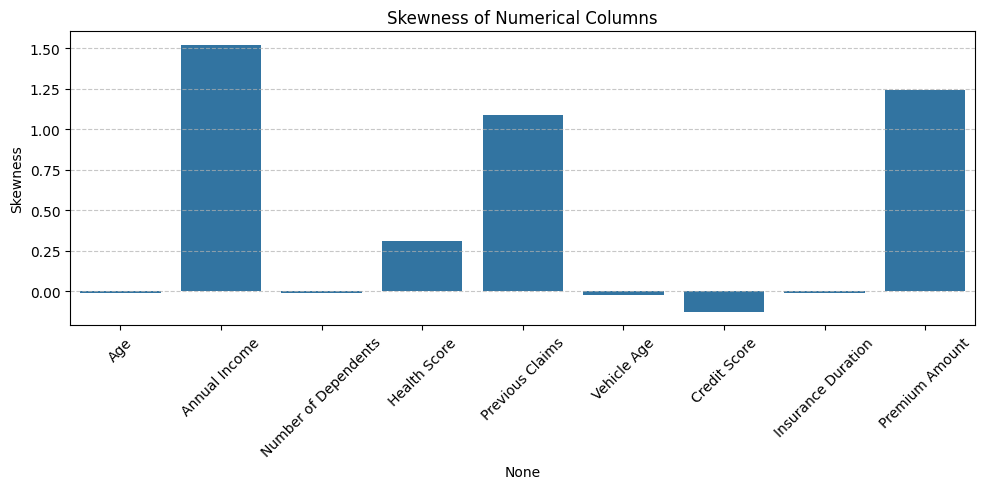

In [17]:
# Select numerical columns only
num_cols = df.select_dtypes(include='number')

# Calculate skewness for each numerical column
skewness = num_cols.skew()
# Display skewness values
print("Skewness of numerical columns:\n")
print(skewness)

# Plot skewness using a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=45)
plt.ylabel("Skewness")
plt.title("Skewness of Numerical Columns")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

